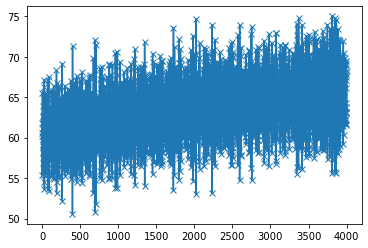


On the Iris dataset, we achieve an accuracy of: 34.0%


In [14]:
import unittest
from Layers import *
from Optimization import *
import numpy as np
import NeuralNetwork
import matplotlib.pyplot as plt
import tabulate
import argparse

net = NeuralNetwork.NeuralNetwork(Optimizers.Sgd(1e-3))
categories = 3
input_size = 4
net.data_layer = Helpers.IrisData(50)
net.loss_layer = Loss.CrossEntropyLoss()

fcl_1 = FullyConnected.FullyConnected(input_size, categories)
net.append_layer(fcl_1)
net.append_layer(ReLU.ReLU())
fcl_2 = FullyConnected.FullyConnected(categories, categories)
net.append_layer(fcl_2)
net.append_layer(SoftMax.SoftMax())

net.train(4000)
plt.figure('Loss function for a Neural Net on the Iris dataset using SGD')
plt.plot(net.loss, '-x')
plt.show()

data, labels = net.data_layer.get_test_set()

results = net.test(data)
index_maximum = np.argmax(results, axis=1)
one_hot_vector = np.zeros_like(results)
for i in range(one_hot_vector.shape[0]):
    one_hot_vector[i, index_maximum[i]] = 1

correct = 0.
wrong = 0.
for column_results, column_labels in zip(one_hot_vector, labels):
    if column_results[column_labels > 0].all() > 0:
        correct += 1
    else:
        wrong += 1

accuracy = correct / (correct + wrong)
print('\nOn the Iris dataset, we achieve an accuracy of: ' + str(accuracy * 100) + '%')